# Assignment II: Visualizations

In [223]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset:
## Melbourne Housing Snapshot

source:
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [224]:
file_path = "C:/Users/math1/Downloads/Bootcamps/Data_Science/track_03/week_10/day_01/melb_data.csv"

#assign the the dataset to df variable
df = pd.read_csv(file_path)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [225]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

#### Notes on Specific Variables

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [227]:
df = df.dropna()

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [229]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [230]:
df.shape

(6196, 21)

------------------------------------------------------------------------------------------------------------------------

# Graphs

### 1. Line Chart

Text(0.5, 0, 'Houses')

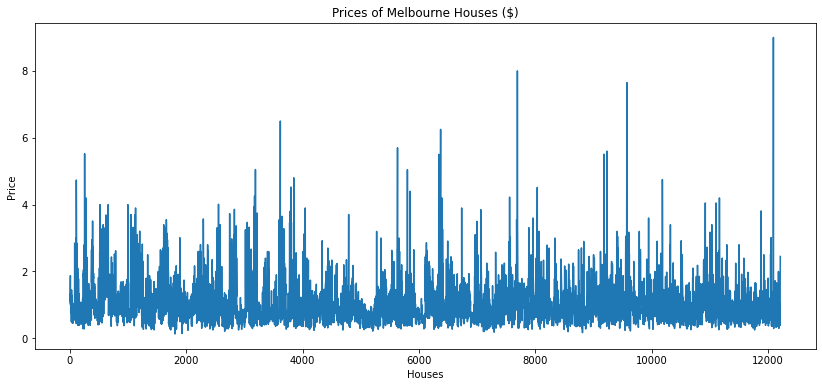

In [231]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Prices of Melbourne Houses ($)")

# Line chart showing Prices
sns.lineplot(data=df['Price']/10**6)

# Add label for horizontal axis
plt.xlabel("Houses")

This line graph shows us the houses prices in the dataset.

### 2.  Bar Chart

In [232]:
Regionnames = pd.Series(df.Regionname.value_counts()).reset_index()


Regionname

,index,Regionname
0,Southern Metropolitan,2166
1,Northern Metropolitan,1854
2,Western Metropolitan,1392
3,Eastern Metropolitan,571
4,South-Eastern Metropolitan,157
5,Eastern Victoria,23
6,Northern Victoria,19
7,Western Victoria,14


Text(0.5, 0, 'Regions')

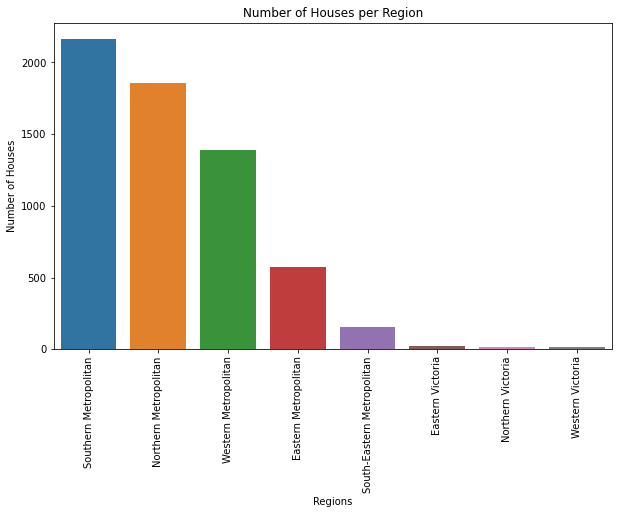

In [233]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of Houses per Region")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
g = sns.barplot(data= Regionname, x=Regionname.index, y=Regionnames.Regionname)

g.set_xticklabels(['Southern Metropolitan','Northern Metropolitan','Western Metropolitan','Eastern Metropolitan',\
                   'South-Eastern Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'], rotation=90)

# Add label for vertical axis
plt.ylabel("Number of Houses")

# Add label for horizontal axis
plt.xlabel("Regions")

This bar graph shows us the number of houses per each region.

### 3. Scatter Plot

Text(0.5, 1.0, 'Prices of Houses per Number of Rooms per Region')

<Figure size 720x720 with 0 Axes>

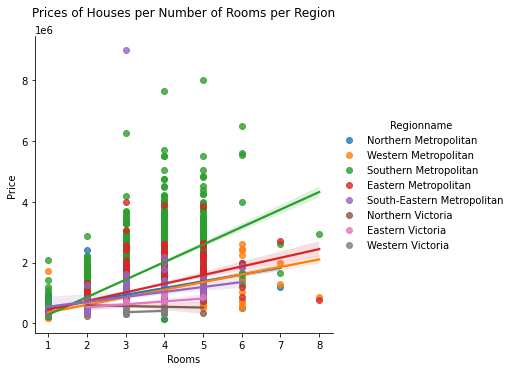

In [234]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))
sns.lmplot(x="Rooms", y="Price", hue="Regionname", data=df)

# Add title
plt.title("Prices of Houses per Number of Rooms per Region",pad= 20)

This scatter plot shows us the relationship between the price of the houses and the number of rooms in it per region.

### 4. Pie Chart

In [235]:
rooms = df['Rooms'].value_counts()

rooms

3    2541
2    1730
4    1278
1     329
5     281
6      28
7       6
8       3
Name: Rooms, dtype: int64

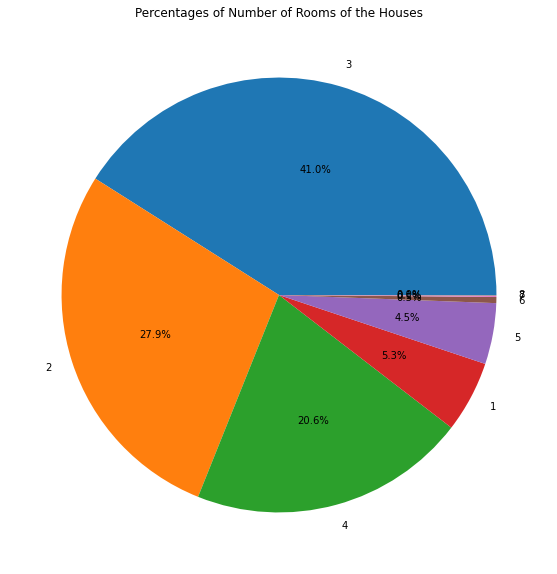

In [236]:
# Create a pie chart fro
series = df["Rooms"].value_counts() # The labels of the bar chart

labels = series.index

values = series.values

# we have three elements in our series and the explode is happening in the order of the levels in the series
explode = (0.1,0.1,0.2)
#colors = ['red', 'blue', 'green']

# Plot the data
plt.figure(figsize=(10,10)) # Change the size of the figure

# Note: autopt --> to give the percentages in the pie chart
# Note: explode ---> to displace the pie chart proportions
# Note: shadow is for adding depth to the pie "3D effect"

plt.pie(values, labels = labels, autopct = '%1.1f%%') 

plt.title("Percentages of Number of Rooms of the Houses") # add title and change color to grey

plt.show() # show results

This pie chart shows us the Distribution of number of rooms in each house in the dataset.

### 5. Histogram

Text(0, 0.5, 'Frequency')

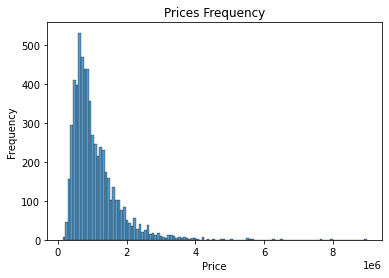

In [237]:
# Histogram 
sns.histplot(df['Price'])

# Add title
plt.title("Prices Frequency")

# Add label for vertical axis
plt.ylabel("Frequency")

This histogram shows us the frequency of the dataset houses prices.

Text(0.5, 1.0, 'Prices Density')

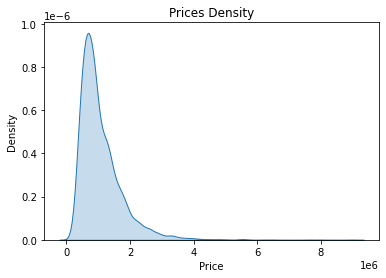

In [238]:
# KDE plot 
sns.kdeplot(data=df['Price'], shade=True)

# Add title
plt.title("Prices Density")

### 6. Boxplot

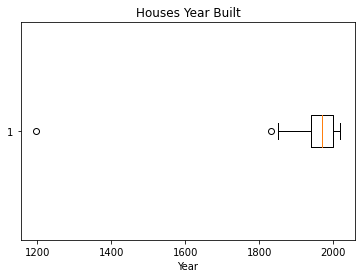

In [239]:
# Boxplot of price

# Save values to a variable
x = df["YearBuilt"].values

# Plot the Boxplot horizontally
plt.boxplot(x, vert=False)

# Add title and labels
plt.title("Houses Year Built")
plt.xlabel("Year")

plt.show()

This boxplot shows us the Distribution of the houses years bulit in the dataset.

### 7. A subplot with 4 of your favorite plots made previously in the assignment

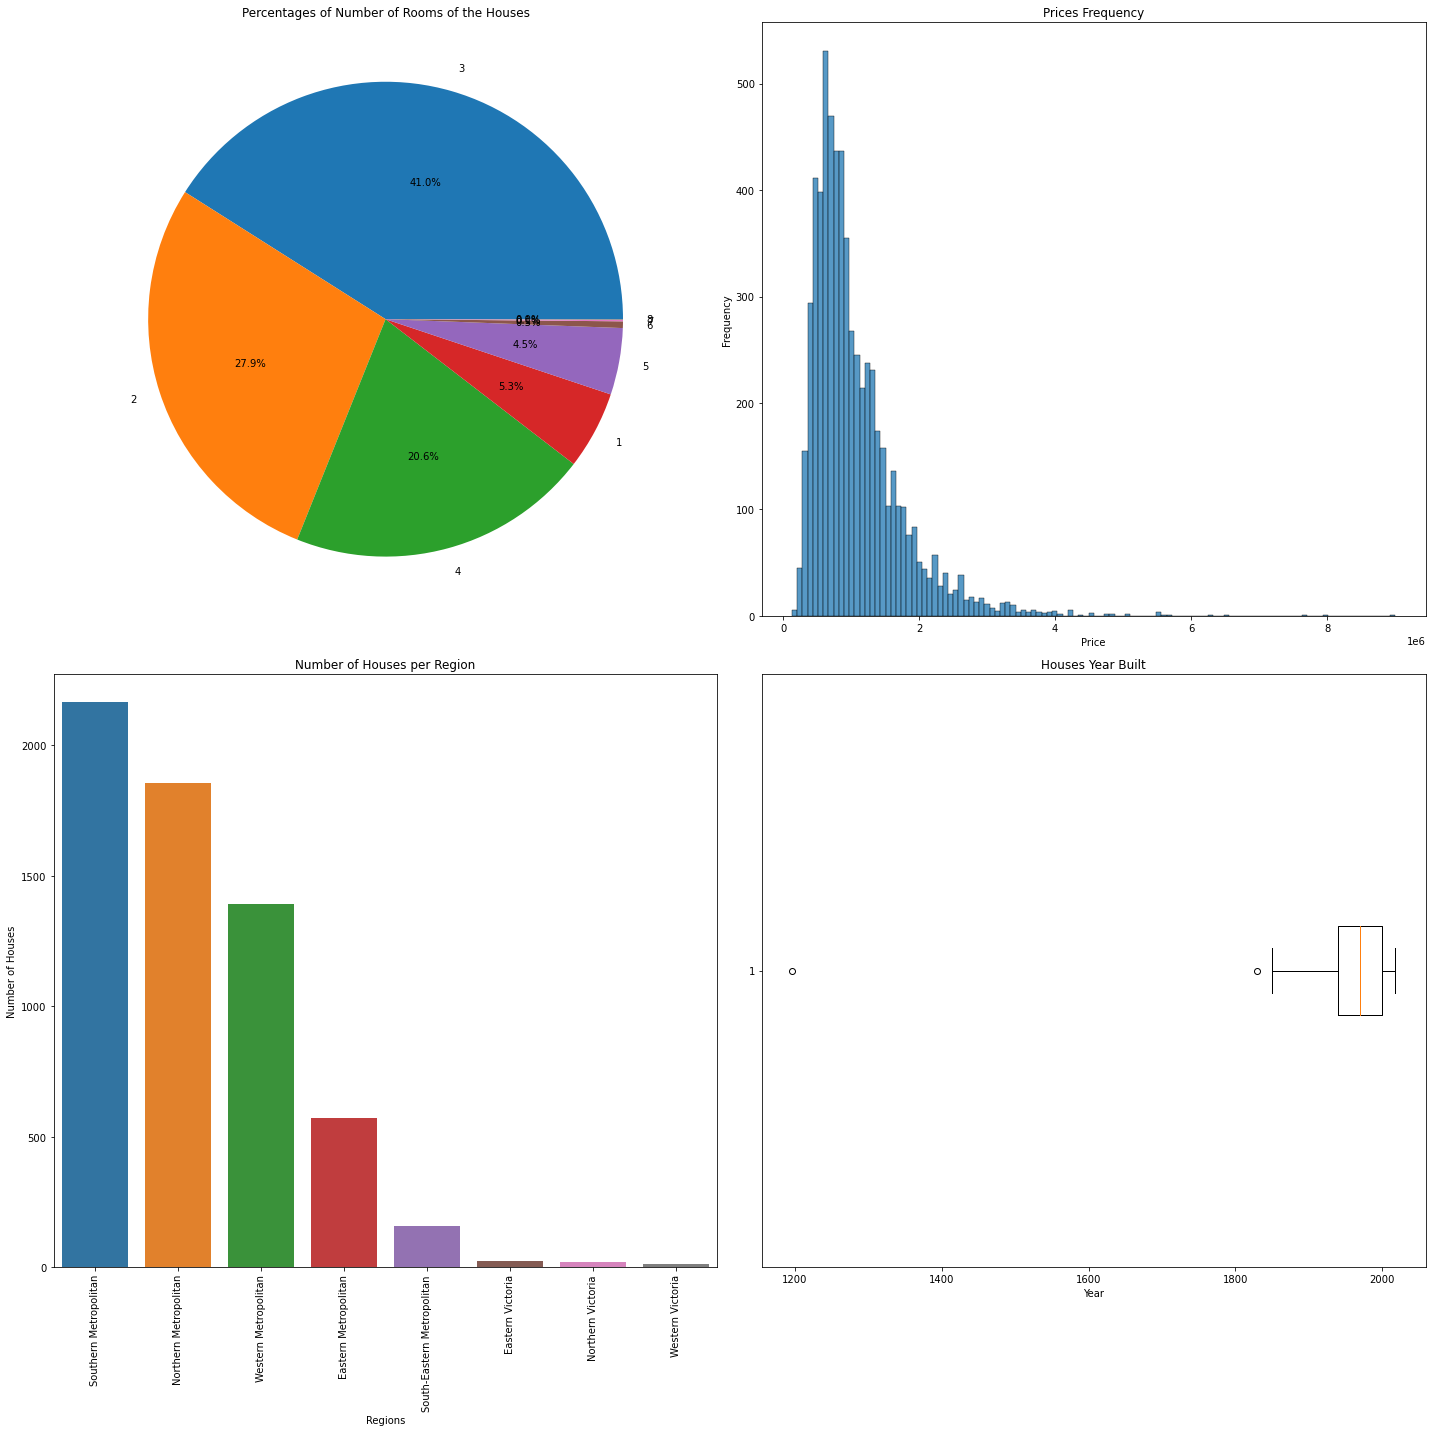

In [240]:
# Create 4 subplots. 2 plots per row and 2 plots per column

plt.figure(figsize=(20,20))

#plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
# Create a pie chart fro
series = df["Rooms"].value_counts() # The labels of the bar chart
labels = series.index
values = series.values
plt.pie(values, labels = labels, autopct = '%1.1f%%') 
plt.title("Percentages of Number of Rooms of the Houses") # add title and change color to grey



#plot 2:
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
# Create some fake data
# Histogram 
sns.histplot(df['Price'])
# Add label for vertical axis
plt.ylabel("Frequency")
# Add title
plt.title("Prices Frequency")


# plot 3:
plt.subplot(2,2,3) # 2x2 plot with plot position 2 (lower left)
# Add title
plt.title("Number of Houses per Region")
# Bar chart showing average arrival delay for Spirit Airlines flights by month
g = sns.barplot(data= Regionname, x=Regionname.index, y=Regionnames.Regionname)
g.set_xticklabels(['Southern Metropolitan','Northern Metropolitan','Western Metropolitan','Eastern Metropolitan',\
                   'South-Eastern Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'], rotation=90)
# Add label for vertical axis
plt.ylabel("Number of Houses")
# Add label for horizontal axis
plt.xlabel("Regions")


# plot 4:
plt.subplot(2,2,4) # 2x2 plot with plot position 2 (lower right)
# Boxplot of price
# Save values to a variable
x = df["YearBuilt"].values
# Plot the Boxplot horizontally
plt.boxplot(x, vert=False)
# Add title and labels
plt.title("Houses Year Built")
plt.xlabel("Year")


plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show()